# Proyek Analisis Data: Classification Image
- Nama        : Sofian Nasution
- Email       : sofiannasution91@gmail.com

## Menyaipkan semua library yang dibuthkan

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files
import matplotlib.pyplot as plt

## memasukkan dataset kedalam projek

In [ ]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/Dicoding/dataset/rockpaperscissors'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.4
)

## Membagi sampel train-test & membuat model squantial

In [ ]:
batch_size = 10
target_size = (150, 150)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=target_size,
    batch_size=batch_size,
    seed=42,
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=target_size,
    batch_size=batch_size,
    seed=42,
    subset="validation"
)

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(3, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


## Membuat Callback untuk EarlyStopping

In [ ]:
early_stopping = EarlyStopping(
    monitor='loss',
    patience=5,
    restore_best_weights=True
)

## Melatih model yang dibuat

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=8,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/8
132/132 - 319s - loss: 0.3115 - accuracy: 0.8935 - val_loss: 0.1685 - val_accuracy: 0.9325 - 319s/epoch - 2s/step
Epoch 2/8
132/132 - 110s - loss: 0.1510 - accuracy: 0.9467 - val_loss: 0.2138 - val_accuracy: 0.9279 - 110s/epoch - 835ms/step
Epoch 3/8
132/132 - 112s - loss: 0.0940 - accuracy: 0.9635 - val_loss: 0.1253 - val_accuracy: 0.9622 - 112s/epoch - 847ms/step
Epoch 4/8
132/132 - 103s - loss: 0.0590 - accuracy: 0.9833 - val_loss: 0.1901 - val_accuracy: 0.9565 - 103s/epoch - 783ms/step
Epoch 5/8
132/132 - 110s - loss: 0.0407 - accuracy: 0.9863 - val_loss: 0.1166 - val_accuracy: 0.9703 - 110s/epoch - 830ms/step
Epoch 6/8
132/132 - 110s - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.1399 - val_accuracy: 0.9703 - 110s/epoch - 835ms/step
Epoch 7/8
132/132 - 111s - loss: 6.9454e-04 - accuracy: 1.0000 - val_loss: 0.1359 - val_accuracy: 0.9737 - 111s/epoch - 843ms/step
Epoch 8/8
132/132 - 115s - loss: 2.0858e-04 - accuracy: 1.0000 - val_loss: 0.1385 - val_accuracy: 0.9748 - 115

## Evaluasi model

In [ ]:
model.evaluate(validation_generator)

88/88 [==============================] - 15s 170ms/step - loss: 0.1385 - accuracy: 0.9748


[0.13847310841083527, 0.9748283624649048]

## Menguji model yang dibuat

Saving 17011647905368455581999716726099.jpg to 17011647905368455581999716726099.jpg
1/1 [==============================] - 0s 36ms/step
17011647905368455581999716726099.jpg
Kertas


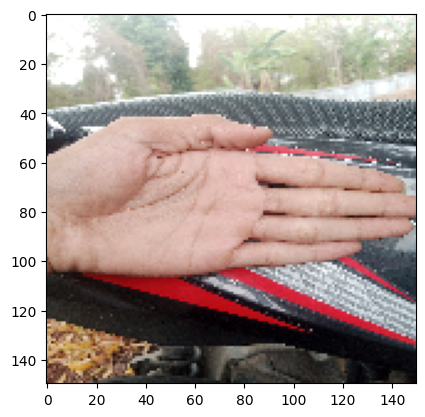

In [ ]:
uploaded = files.upload()

for name in uploaded.keys():
    img = tf.keras.preprocessing.image.load_img(name, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    print(name)
    if predictions[0][0] > predictions[0][1] and predictions[0][0] > predictions[0][2]:
        print("Kertas")
    elif predictions[0][1] > predictions[0][0] and predictions[0][1] > predictions[0][2]:
        print("Batu")
    else:
        print("Gunting")
    plt.imshow(img)
    plt.show()